<a href="https://colab.research.google.com/github/rodneysande/DATA-SCIENCE/blob/main/road_accident_severity_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

data = {
    'Speed': [80, 60, 100, 40, 70],
    'Weather': [1, 0, 1, 0, 1],
    'RoadCondition': [2, 1, 2, 1, 2],
    'LightCondition': [1, 0, 1, 0, 1],
    'VehicleAge': [3, 5, 2, 6, 4],
    'AccidentSeverity': [4.5, 2.1, 5.8, 1.5, 3.9]
}

df = pd.DataFrame(data)

X = df[['Speed', 'Weather', 'RoadCondition', 'LightCondition', 'VehicleAge']]
y = df['AccidentSeverity']

model = LinearRegression()
model.fit(X, y)

joblib.dump(model, 'accident_severity_model.pkl')

print("Model trained and saved successfully.")


Model trained and saved successfully.


In [12]:
import joblib
import numpy as np
import pandas as pd

model = joblib.load('accident_severity_model.pkl')
new_case_df = pd.DataFrame([[90, 1, 2, 1, 3]], columns=['Speed', 'Weather', 'RoadCondition', 'LightCondition', 'VehicleAge']) # fast speed, rainy, wet road, night, 3-year-old car

predicted_severity = model.predict(new_case_df)
print(f"Predicted Accident Severity: {predicted_severity[0]:.2f}")

Predicted Accident Severity: 4.85


/tmp/ipython-input-1421009507.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')


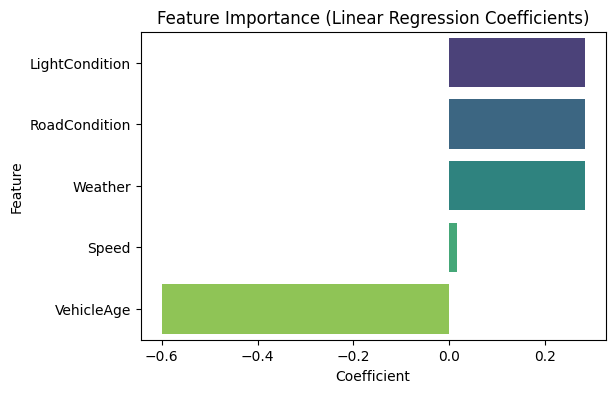

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()